In [1]:
import numpy as np
import scipy.stats as stats
from tqdm import tqdm as tqdm
import random
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Что мы прошли на прошлых 3 занятиях

### Тесты для гипотезы сравнения средних 
- Параметрические тесты: 
    - z-тест
    - t-тест
- Непараметрические тесты:
    - Бутстрап
    
### Тесты для гипотез сравнения распределений
- Непараметрические тесты:
    - Колмагорова-Cмирнова 
    - Mанн-Уитни

--- 
### Синтетические АА-тесты для проверки валидности критерия
- на полностью синтетической модели данных
- на исторических данных 
    - независимые сегменты данных (например, разбиение по неделям и гео)
    - шаффлинг одного и того же датасета (проблема: зависимость выборок)

### Синтетические АB-тесты для проверки качества критерия
- при условии валидности критерия сравниваем мощности 

### Метрики отношения
- Дельта-метод оценки дисперсии
- Линеаризация
- Бакетизация
- Бутстрап


## 1. 1 Доверительные интервалы 

Доверительный интервал (или Confidence Interval, CI) — это диапазон значений, который с определённой вероятностью (уровнем доверия) содержит неизвестный параметр генеральной совокупности, например, среднее или долю.


При нулевой гипотезе распределение $\bar X_t - \bar X_с \xrightarrow{d} \mathcal{N}(0, \dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_с^2}{m})$


При альтернативной: $\bar X_t - \bar X_с - e \xrightarrow{d} \mathcal{N}(0, \dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_с^2}{m})$, где $e$ - это некоторый эффект. 

ИЛИ 

$\dfrac{\bar X_t - \bar X_с}{\hat\sigma} \xrightarrow{d} \mathcal{N}(\dfrac{e}{\hat\sigma}, 1)$

$$z_{\alpha/2}\le \dfrac{\Delta - e}{\hat \sigma} \le z_{1-\alpha/2}$$

$$
e \in \Delta \pm z_{1 - \alpha/2}\hat\sigma
$$

Важно помнить: Доверительный интервал не говорит, что с вероятностью 95% параметр "находится внутри интервала". Он говорит, что процедура построения интервала (при многократном повторении) даёт правильный результат в 95% случаев.




<img src="pictures/CI1.png" width="600">

<img src="pictures/CI2.png" width="600">


## 1. 2 Uplift-метрики или процентные приращения


<img src="pictures/estimators.png" width="800">

## 1. 3 Доверительный интервал для value метрик: дельта

<img src="pictures/delta_value.png" width="800">

## 1. 4 Доверительный интервал для ratio метрик: дельта

<img src="pictures/delta_ratio.png" width="800">

## 1.5 Доверительный интервал для value метрик: uplift

$$
\mathrm{Var}\left(\frac{X}{Y}\right) \approx  \frac{1}{\mu_Y^2}\cdot\sigma_X^2 
- 2\frac{\mu_X}{\mu_Y^3}\cdot \sigma_{XY}
+ \frac{\mu_X^2}{\mu_Y^4}\cdot\sigma_Y^2
$$

$\sigma_{XY} = 0$, так как тестовая группа не зависит от контрольной 

<img src="pictures/uplift_value.png" width="800">

## 1.5 Доверительный интервал для ratio метрик: uplift

Возьмем функцию трансформации

$
g(X_t, Y_t, X_c, Y_c) = \frac{X_t}{Y_t} \Big/ \frac{X_c}{Y_c} = \frac{X_t Y_c}{Y_t X_c}
$

Тогда градиент будет равен:
$
\nabla g(X_t, Y_t, X_c, Y_c) =
\begin{bmatrix}
\frac{Y_c}{Y_t X_c} \\[2ex]
-\frac{X_t Y_c}{Y_t^2 X_c} \\[2ex]
-\frac{X_t Y_c}{Y_t X_c^2} \\[2ex]
\frac{X_t}{Y_t X_c}
\end{bmatrix}
$


Ковариационная матрица выглядит так:

$
\Sigma = 
\begin{bmatrix}
\sigma^2_{X_t} & \sigma_{X_t Y_t} & 0 & 0 \\
\sigma_{X_t Y_t} & \sigma^2_{Y_t} & 0 & 0 \\
0 & 0 & \sigma^2_{X_c} & \sigma_{X_c Y_c} \\
0 & 0 & \sigma_{X_c Y_c} & \sigma^2_{Y_c}
\end{bmatrix}
$


**Дисперсия будет примерно равна:**


$
\mathrm{Var}\left( \dfrac{X_t }{Y_t}  /   \dfrac{X_c}{Y_c} \right) \approx 
\nabla g(\mu_{X_t}, \mu_{Y_t}, \mu_{X_c}, \mu_{Y_c})^T \;
\Sigma \;
\nabla g(\mu_{X_t}, \mu_{Y_t}, \mu_{X_c}, \mu_{Y_c}) = 
$



$
= \left[
\frac{\mu_{\scriptstyle Y_c}}{\mu_{\scriptstyle Y_t}\mu_{\scriptstyle X_c}},\;
-\frac{\mu_{\scriptstyle X_t}\mu_{\scriptstyle Y_c}}{\mu_{\scriptstyle Y_t}^2\mu_{\scriptstyle X_c}},\;
-\frac{\mu_{\scriptstyle X_t}\mu_{\scriptstyle Y_c}}{\mu_{\scriptstyle Y_t}\mu_{\scriptstyle X_c}^2},\;
\frac{\mu_{\scriptstyle X_t}}{\mu_{\scriptstyle Y_t}\mu_{\scriptstyle X_c}}
\right]
\begin{bmatrix}
\sigma^2_{\scriptstyle X_t} & \sigma_{\scriptstyle X_t Y_t} & 0 & 0 \\
\sigma_{\scriptstyle X_t Y_t} & \sigma^2_{\scriptstyle Y_t} & 0 & 0 \\
0 & 0 & \sigma^2_{\scriptstyle X_c} & \sigma_{\scriptstyle X_c Y_c} \\
0 & 0 & \sigma_{\scriptstyle X_c Y_c} & \sigma^2_{\scriptstyle Y_c}
\end{bmatrix}
\begin{bmatrix}
\dfrac{\mu_{\scriptstyle Y_c}}{\mu_{\scriptstyle Y_t}\mu_{\scriptstyle X_c}} \\[2ex]
-\dfrac{\mu_{\scriptstyle X_t}\mu_{\scriptstyle Y_c}}{\mu_{\scriptstyle Y_t}^2\mu_{\scriptstyle X_c}} \\[2ex]
-\dfrac{\mu_{\scriptstyle X_t}\mu_{\scriptstyle Y_c}}{\mu_{\scriptstyle Y_t}\mu_{\scriptstyle X_c}^2} \\[2ex]
\dfrac{\mu_{\scriptstyle X_t}}{\mu_{\scriptstyle Y_t}\mu_{\scriptstyle X_c}}  
\end{bmatrix}=
\dfrac{\mu_{Y_c}^2}{\mu_{Y_t}^2\mu_{X_c}^2} \sigma_{X_t}^2 
$


$
=\dfrac{\mu_{Y_c}^2}{\mu_{Y_t}^2\mu_{X_c}^2} \sigma_{X_t}^2
-2\dfrac{\mu_{X_t}\mu_{Y_c}^2}{\mu_{Y_t}^3\mu_{X_c}^2}
+\dfrac{\mu_{X_t}^2\mu_{Y_c}^2}{\mu_{Y_t}^4\mu_{X_c}^2} \sigma_{Y_t}^2
+\dfrac{\mu_{X_t}^2\mu_{Y_c}^2}{\mu_{Y_t}^2\mu_{X_c}^4} \sigma_{X_c}^2
-2\dfrac{\mu_{X_t}\mu_{Y_c}^2}{\mu_{Y_t}^2\mu_{X_c}^3} \sigma_{X_c Y_c}
+\dfrac{\mu_{X_t}^2}{\mu_{Y_t}^2\mu_{X_c}^2} \sigma_{Y_c}^2
$


---

$
\hat{\mathbf{Var}} (\dfrac{\bar X_t}{\bar Y_t} / \dfrac{\bar X_c}{\bar Y_c}) =  \dfrac{\bar{Y}_c^2}{\bar{X}_c^2} \hat{\mathbf{Var}} (\dfrac{\bar X_t}{\bar Y_t}) +  \dfrac{\bar{X}_t^2}{\bar{Y}_t^2} \hat{\mathbf{Var}} (\dfrac{\bar Y_c}{\bar X_c}) 
$


Используя тот же дельта-метод: 
$
\hat{\mathbf{Var}} (\dfrac{1}{X}) \approx   \dfrac{1}{X^4} \hat{\mathbf{Var}} (X) 
$



$
  \hat\sigma^2 =  \hat{\mathbf{Var}} (\dfrac{R_t}{R_c} - 1) =  \dfrac{1}{R_c^2} \hat{\mathbf{Var}} (R_t) +  \dfrac{R_t^2}{R_c^4} \hat{\mathbf{Var}} (R_c) 
$

$
\dfrac{\dfrac{R_t}{R_c} - 1}{\sqrt{\hat{\mathbf{Var}} (\dfrac{R_t}{R_c} - 1)}}  \rightarrow \mathcal{N}(0,1)
$


$
R_t=  \dfrac{\bar X_t}{\bar Y_t}, R_c=  \dfrac{\bar X_c}{\bar Y_c}, 
$

---

<img src="pictures/uplift_ratio.png" width="800">

In [2]:
def proportion_ci(pvalue_vector, alpha=0.05):
    pvalue_vector = np.asarray(pvalue_vector).flatten()
    n = len(pvalue_vector)
    count = np.sum(pvalue_vector < alpha)
    p = count / n
    left_bound = p - np.sqrt(p * (1 - p) / n) * stats.norm.ppf(1-alpha/2)
    right_bound = p + np.sqrt(p * (1 - p) / n) * stats.norm.ppf(1-alpha/2)
    return p, left_bound, right_bound

def plot_comparison_with_uniform(p_value_vector, title, color='skyblue'):
    # Предполагаем, что функция proportion_ci определена отдельно
    p, left_boundary, right_boundary = proportion_ci(p_value_vector)
    print(f"Ошибка I рода: {round(p, 4)},\nCI для oшибки I рода: [{round(left_boundary, 4)}, {round(right_boundary, 4)}]")

    fig1, ax1 = plt.subplots(1, 3, figsize=(17, 5))
    
    # --- 1. Гистограмма P-value ---
    ax1[0].hist(p_value_vector, bins=30, edgecolor='black', alpha=0.7, color=color)
    ax1[0].set_title(
        f'Ошибка I рода: {round(np.sum(np.array(p_value_vector) < 0.05) / len(p_value_vector), 3)}'
    )
    ax1[0].set_xlabel('P-value')
    ax1[0].set_ylabel('Частота')
    
    # --- 2. QQ-график ---
    stats.probplot(p_value_vector, dist=stats.uniform, plot=ax1[1])
    ax1[1].get_lines()[1].set_linestyle('--')
    ax1[1].set_title(f'{title} (QQ-график)')
    
    # --- 3. Эмпирическая функция распределения ---
    pvals_sorted = np.sort(p_value_vector)
    n = len(pvals_sorted)
    ecdf = np.arange(1, n+1) / n

    x_uniform = np.linspace(0, 1, 200)
    cdf_uniform = x_uniform

    ax1[2].step(pvals_sorted, ecdf, where='post', label='Эмпирическая ФР', color=color)
    ax1[2].plot(x_uniform, cdf_uniform, 'k--', label='Теоретическая CDF $U[0,1]$')
    
    # --- Тест Колмогорова-Смирнова ---
    ks_statistic, ks_p_value = stats.kstest(p_value_vector, 'uniform', args=(0, 1))
    print(f'Статистика Колмагорова-Смирнова: {round(ks_statistic, 4)}, pvalue для сравнения ЭФР с равномерным: {round(ks_p_value, 4)}')
    if ks_p_value < 0.05:
        print("Гипотеза H0 отвергается: выборка НЕ из равномерного U(0,1)")
    else:
        print("Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)")
    
    ax1[2].set_title('Эмпирическая и теоретическая ФР')
    ax1[2].set_xlabel('p-value')
    ax1[2].set_ylabel('F(p-value)')
    ax1[2].legend(loc="lower right")
    ax1[2].text(
        0.05, 0.9,
        f"KS: stat={ks_statistic:.3f}\np={ks_p_value:.3f}",
        transform=ax1[2].transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle="round", fc="w", alpha=0.5)
    )

    plt.tight_layout()
    plt.show()
    
def safe_divide(x, y):
    try:
        return x / y
    except ZeroDivisionError:
        return np.nan

def ratio_sample(num_users = 10000, events_per_user = 5, effect = 0):
    # матожидание чека для пользователя, вектор длинны количества пользователей 
    mu = np.random.uniform(300, 1000, size=num_users)
    # число наблюдений по пользователю,ве ктор длинны количества пользователей 
    n = np.random.poisson(events_per_user-1, size=num_users)
    numerator = []
    denominator = []

    for i in range(num_users):
        # Генерация экспоненциальных случайных чисел для текущего пользователя
        user_events = np.random.exponential(mu[i], n[i]+1)
        # Добавление событий текущего пользователя в общий список событий
        numerator.append((1+effect)*np.sum(np.array(user_events)))
        denominator.append(n[i]+1)

    return numerator, denominator

def delta_var(numerator, denominator):
    """
    Функция для расчета дисперсии дельта-методом, numerator - вектор числитель, denominator - вектор знаменатель
    """
    x = numerator
    y = denominator
    n = len(x)
    mu_x = np.mean(x)
    mu_y = np.mean(y)
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)
    cov_xy = np.cov(x, y, ddof=1)[0][1]    
    delta_var = safe_divide(safe_divide(var_x,mu_y**2)  - 2*cov_xy*safe_divide(mu_x,mu_y**3) + var_y*safe_divide(mu_x**2,mu_y**4), n)
    return delta_var

def delta_value(x_num, y_num):
    t_stat, p_value = stats.ttest_ind(x_num, y_num, equal_var=False)
    return  p_value

def delta_ratio(x_num, x_denom, y_num, y_denom):
    n = len(x_num)
    m = len(y_num)
    test_var = delta_var(x_num, x_denom)
    control_var = delta_var(y_num, y_denom)
    sigma = np.sqrt(test_var + control_var)
    delta_estimator = safe_divide(np.mean(x_num), np.mean(x_denom)) - safe_divide(np.mean(y_num), np.mean(y_denom))
    tt = safe_divide(delta_estimator, sigma)
    p_value = 2*stats.t.sf(np.abs(tt),n+m-2)
    return  p_value

def uplift_value(x_num, y_num):
    n = len(x_num)
    m = len(y_num)
    var_x = np.var(x_num, ddof=1)
    var_y = np.var(y_num, ddof=1)  
    mu_x = np.mean(x_num)
    mu_y = np.mean(y_num)
    delta_var = safe_divide(var_x, n * mu_y**2)  + safe_divide(var_y*mu_x**2, m * mu_y**4)
    sigma = np.sqrt(delta_var)
    uplift_estimator = mu_x/mu_y - 1
    tt = safe_divide(uplift_estimator, sigma)
    p_value = 2*stats.t.sf(np.abs(tt),n+m-2)
    return  p_value

def uplift_ratio(x_num, x_denom, y_num, y_denom):
    n = len(x_num)
    m = len(y_num)
    test_var = delta_var(x_num, x_denom)
    control_var = delta_var(y_num, y_denom)
    test_estimator = safe_divide(np.mean(x_num), np.mean(x_denom))
    control_estimator = safe_divide(np.mean(y_num), np.mean(y_denom))
    sigma = np.sqrt(test_var/control_estimator**2 + control_var*test_estimator**2/control_estimator**4)
    delta_estimator = test_estimator/control_estimator - 1
    tt = safe_divide(delta_estimator, sigma)
    p_value = 2*stats.t.sf(np.abs(tt),n+m-2)
    return  p_value

In [3]:
p_delta_value = []
p_delta_ratio = []
p_uplift_value = []
p_uplift_ratio = []
for i in tqdm(range(1000)):
    x_num, x_denom = ratio_sample(10000, 2)
    y_num, y_denom = ratio_sample(10000, 2)
    p_delta_value.append(delta_value(x_num, y_num))
    p_delta_ratio.append(delta_ratio(x_num, x_denom, y_num, y_denom))
    p_uplift_value.append(uplift_value(x_num, y_num))
    p_uplift_ratio.append(uplift_ratio(x_num, x_denom, y_num, y_denom))

100%|██████████| 1000/1000 [00:58<00:00, 17.16it/s]


Ошибка I рода: 0.047,
CI для oшибки I рода: [0.0339, 0.0601]
Статистика Колмагорова-Смирнова: 0.0292, pvalue для сравнения ЭФР с равномерным: 0.3525
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


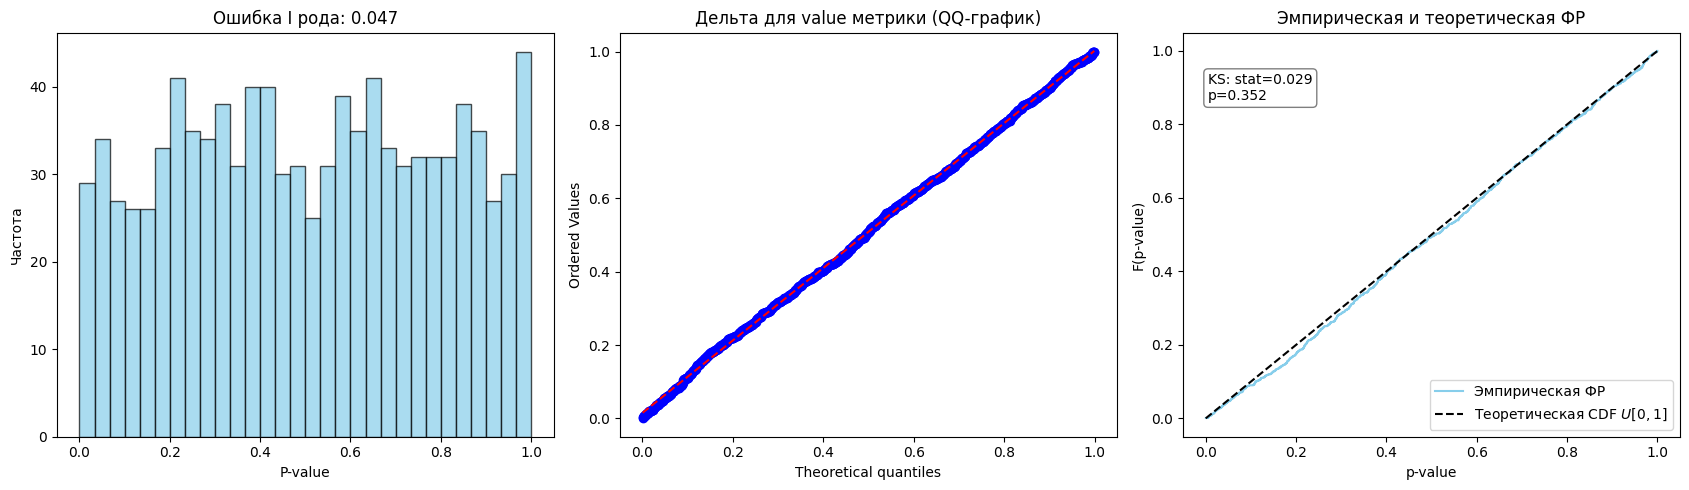

In [4]:
plot_comparison_with_uniform(p_delta_value, "Дельта для value метрики")

Ошибка I рода: 0.049,
CI для oшибки I рода: [0.0356, 0.0624]
Статистика Колмагорова-Смирнова: 0.0267, pvalue для сравнения ЭФР с равномерным: 0.466
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


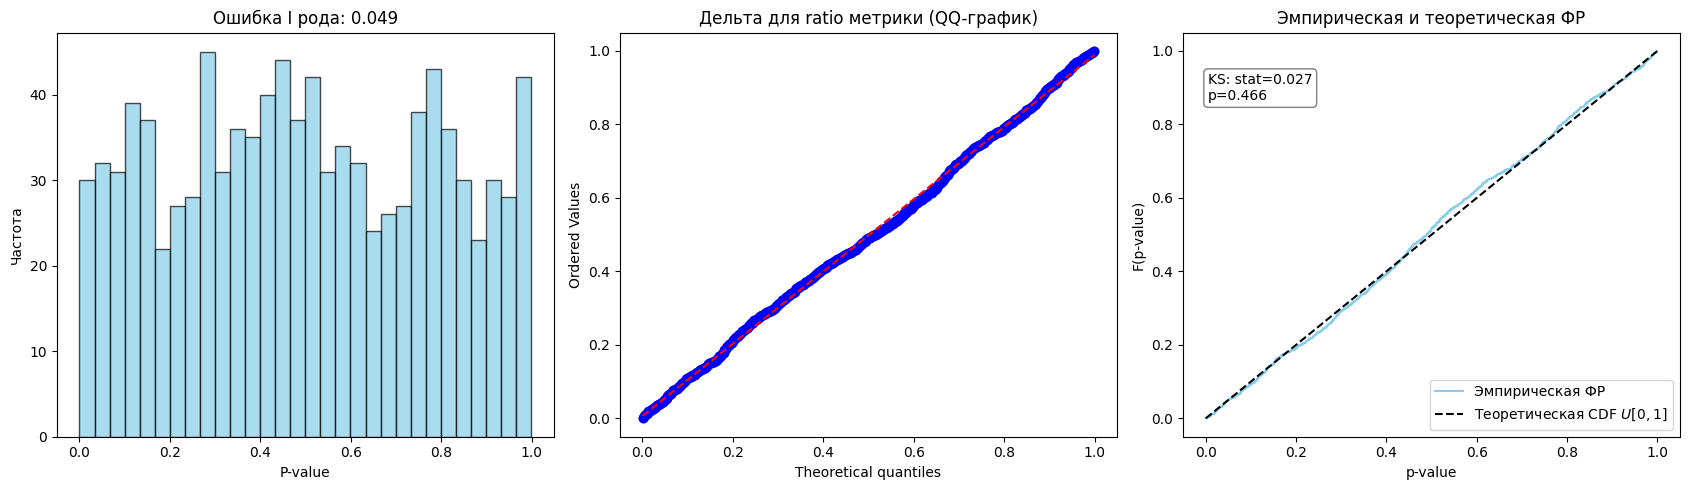

In [5]:
plot_comparison_with_uniform(p_delta_ratio, "Дельта для ratio метрики")

Ошибка I рода: 0.046,
CI для oшибки I рода: [0.033, 0.059]
Статистика Колмагорова-Смирнова: 0.0289, pvalue для сравнения ЭФР с равномерным: 0.3657
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


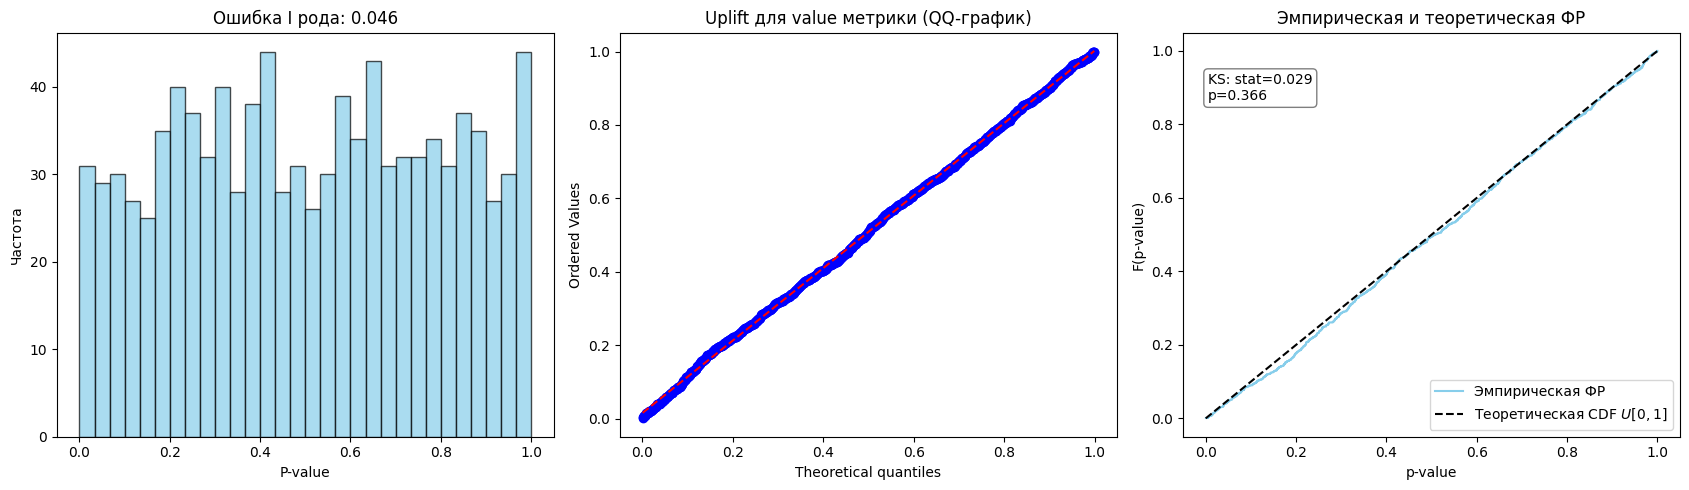

In [6]:
plot_comparison_with_uniform(p_uplift_value, "Uplift для value метрики")

Ошибка I рода: 0.051,
CI для oшибки I рода: [0.0374, 0.0646]
Статистика Колмагорова-Смирнова: 0.0276, pvalue для сравнения ЭФР с равномерным: 0.4236
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


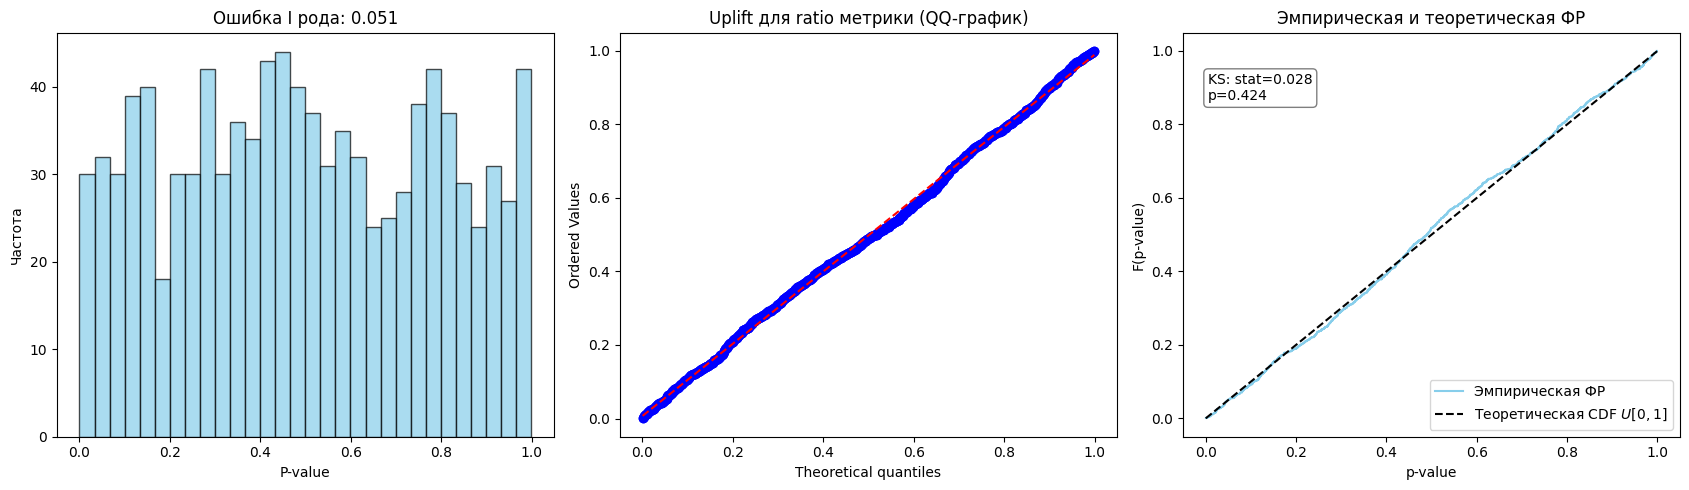

In [7]:
plot_comparison_with_uniform(p_uplift_ratio, "Uplift для ratio метрики")

## 3. Сравнение мощности дельты и uplift

In [8]:
good_cnt_delta_value = []
good_cnt_delta_ratio = []
good_cnt_uplift_value = []
good_cnt_uplift_ratio = []
for n in [100, 500, 1000, 5000, 10000]:
    cnt_delta_value = 0
    cnt_delta_ratio = 0
    cnt_uplift_value = 0
    cnt_uplift_ratio = 0
    for i in tqdm(range(1000)):
        x_num, x_denom = ratio_sample(n, 2, effect = 0.05)
        y_num, y_denom = ratio_sample(n, 2)
        cnt_delta_value += delta_value(x_num, y_num)
        cnt_delta_ratio += delta_ratio(x_num, x_denom, y_num, y_denom)
        cnt_uplift_value += uplift_value(x_num, y_num)
        cnt_uplift_ratio += uplift_ratio(x_num, x_denom, y_num, y_denom)
    good_cnt_delta_value.append(cnt_delta_value/1000)
    good_cnt_delta_ratio.append(cnt_delta_ratio/1000)
    good_cnt_uplift_value.append(cnt_uplift_value/1000)
    good_cnt_uplift_ratio.append(cnt_uplift_ratio/1000)

100%|██████████| 1000/1000 [00:58<00:00, 17.24it/s]


In [9]:
for n in [20000]:
    cnt_delta_value = 0
    cnt_delta_ratio = 0
    cnt_uplift_value = 0
    cnt_uplift_ratio = 0
    for i in tqdm(range(1000)):
        x_num, x_denom = ratio_sample(n, 2, effect = 0.05)
        y_num, y_denom = ratio_sample(n, 2)
        cnt_delta_value += delta_value(x_num, y_num)
        cnt_delta_ratio += delta_ratio(x_num, x_denom, y_num, y_denom)
        cnt_uplift_value += uplift_value(x_num, y_num)
        cnt_uplift_ratio += uplift_ratio(x_num, x_denom, y_num, y_denom)
    good_cnt_delta_value.append(cnt_delta_value/1000)
    good_cnt_delta_ratio.append(cnt_delta_ratio/1000)
    good_cnt_uplift_value.append(cnt_uplift_value/1000)
    good_cnt_uplift_ratio.append(cnt_uplift_ratio/1000)

100%|██████████| 1000/1000 [01:57<00:00,  8.50it/s]


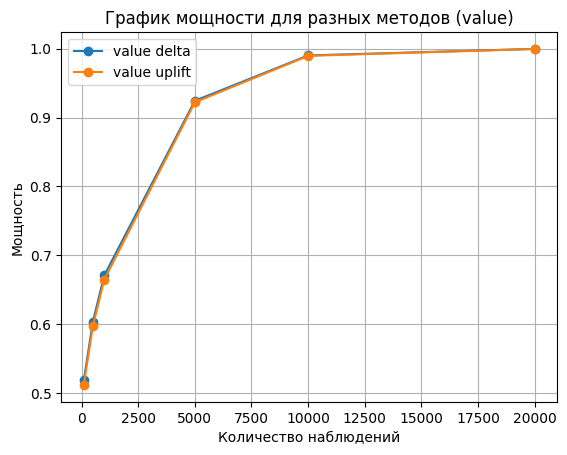

In [13]:
n = [100, 500, 1000, 5000, 10000, 20000]

plt.plot(n, 1-np.array(good_cnt_delta_value), marker='o', label='value delta')
plt.plot(n, 1-np.array(good_cnt_uplift_value), marker='o', label='value uplift')

plt.xlabel('Количество наблюдений')
plt.ylabel('Мощность')
plt.title('График мощности для разных методов (value)')
plt.legend()
plt.grid(True)
plt.show()

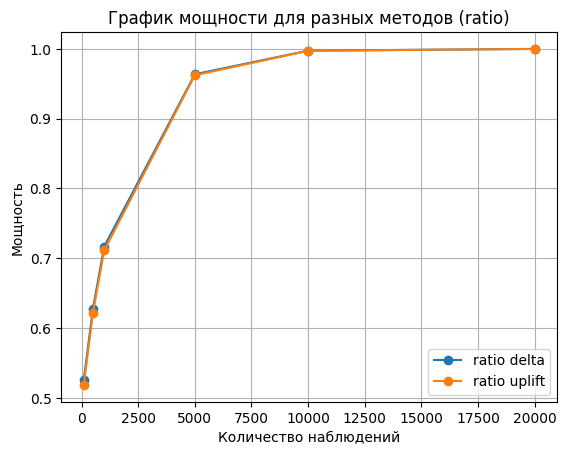

In [14]:
n = [100, 500, 1000, 5000, 10000, 20000]

plt.plot(n, 1-np.array(good_cnt_delta_ratio), marker='o', label='ratio delta')
plt.plot(n, 1-np.array(good_cnt_uplift_ratio), marker='o', label='ratio uplift')

plt.xlabel('Количество наблюдений')
plt.ylabel('Мощность')
plt.title('График мощности для разных методов (ratio)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
n = [100, 500, 1000, 5000, 10000, 20000]

df = pd.DataFrame({
    'value delta': good_cnt_delta_value,
    'value uplift': good_cnt_uplift_value,
    'ratio delta': good_cnt_delta_ratio,
    'ratio uplift': good_cnt_uplift_ratio,

}, index=n)

df.index.name = 'n'
print(df)

       value delta  value uplift  ratio delta  ratio uplift
n                                                          
100       0.481252      0.488114     0.474038      0.481517
500       0.396241      0.402699     0.372480      0.378781
1000      0.329283      0.335478     0.283197      0.288833
5000      0.075701      0.077913     0.036392      0.037797
10000     0.009926      0.010523     0.002549      0.002753
20000     0.000455      0.000490     0.000059      0.000064


<img src="pictures/all_metric_ratio.png" width="800">

## 4. Еще про делта-метод, практический пример

## Метрика элатичности

uplift_GVM = $\dfrac{\overline{GMV_t}}{\overline{GMV_c}} -1$

delta_sub_GMV = $\dfrac{\overline{sub_t}}{\overline{GMV_t}} - \dfrac{\overline{sub_c}}{\overline{GMV_c}}$

Нам нужна метрика uplift_GVM/delta_sub_GMV

## 5. Персентильные доверительные интервалы 

In [26]:
def ratio_sample_new(num_users = 10000, events_per_user = 2, effect = 0):
    # матожидание чека для пользователя, вектор длинны количества пользователей 
    mu = np.random.uniform(300, 1000, size=num_users)
    # число наблюдений по пользователю,ве ктор длинны количества пользователей 
    n = np.random.poisson(events_per_user-1, size=num_users)
    numerator = []
    denominator = []
    user_ids = []
    for i in range(num_users):
        curr_mu = mu[i] * (1 + effect)
        user_events = np.random.exponential(curr_mu, n[i]+1)
        # Добавление событий текущего пользователя в общий список событий
        numerator.extend(user_events)  # numerator = значение события (или своя логика)
        denominator.extend([1] * len(user_events))
        user_ids.extend([i] * len(user_events))
    df = pd.DataFrame({
        'user_id': user_ids,
        'numerator': numerator,
        'denominator': denominator
    })
    return df


def indicator_perc_iid(df, percentile = 0.99, alpha = 0.05):
    p = percentile
    z = stats.norm.ppf(1 - alpha / 2)
    agg_df = df.groupby('user_id')['numerator'].sum().tolist()
    sorted_vector = np.sort(agg_df)
    n = len(agg_df)
    sigma = np.sqrt(p * (1 - p) / n)
    lower = max(0, int(np.floor(n*(p - z * sigma))))
    upper = min(int(np.floor(n*(p + z * sigma)))+1, n-1)
    return sorted_vector[lower], sorted_vector[upper]

def indicator_perc(df, percentile = 0.99,  alpha = 0.05):
    X_p = np.percentile(df['numerator'].tolist(), percentile*100)
    df['indicator'] = (df['numerator'] <= X_p).astype(int)
    num = df.groupby('user_id')['indicator'].sum().tolist()
    denom = df.groupby('user_id')['denominator'].sum().tolist()
    sigma = np.sqrt(delta_var(num, denom))
    z = stats.norm.ppf(1 - alpha / 2)
    p =  df['indicator'].mean()
    n = len(df)
    lower = max(0, int(np.floor(n*(p - z * sigma))))
    upper = min(int(np.floor(n*(p + z * sigma)))+1, n-1)
    sorted_vector = np.sort(df['numerator'].tolist())
    return sorted_vector[lower], sorted_vector[upper]



Есть статья [Денга](https://arxiv.org/pdf/1803.06336), в которой он рассказывает как строить доверительные интервалы для персентилей. 

Предположим, что наши данные имеют распределение  $F(x)$ и мы рассматриваем квантиль $p$

Что такое теоретическая квантиль $p$ (персентиль): это такое значение $x_p$, что $P(X < x_p) = F(x_p) = p$. 

То есть 

$x_p = F^{-1}(p)$ 

Что такое выборочная квантиль $p$ (персентиль): это такое значение $X_i$, что $P(X < x_p) = F(x_p) = p$. 

То есть 

$x_p = F^{-1}(p)$ 

- Персентили актуальны только для value метрик

Бывают двух типов: 
- **на независимых данных:** персентиль после поюзерной агрегации (персентиль по тратам в течение периода)
- **на зависимых данных:** персентиль пособытийная (персентиль по стоимости поездки, времени загрузки приложения, ...)

### Персентиль на независимых данных
Для расчета берутся данные после поюзерной агрегации (на уровне пользователя). 

Пусть $X_i$ - данные теста, $Y_i$ данные контроля. 

Есть изящный ход, который позволяет посчитать outer доверительный интервал таким образом: 

Вводится дополнительная переменная 

$X_i^p = I\{X_i \le F^{-1}(p)\}$ - индикатор, который возвращает 1, если $X_i$ меньше истинного значения квантили, 0 иначе.

Интересные факты о $X_i^p$:

- $X_i^p$ - случайная величина Бернулли с вероятностью успеха $p$
  
- $\sum X_i^p$ -  количество наблюдений не превышающих квантиль
- $\sum X_i^p$ - следует биномиальному распределению, как сумма случайных величин Бернулли

- $\overline{X}^p - p \approx N(0, \dfrac{p(1-p)}{n})$

- если $F^{-1}(p) = x_p \in [X_{(r)}, X_{(r+1)}]$, то $\overline{X}^p = \dfrac{r}{n}$

- мы можем построить доверительный интервал для  $\overline{X}^p = \dfrac{r}{n}: p \pm z_{1-\alpha/2} \cdot \dfrac{p(1-p)}{\sqrt{n}}$


Поэтому можно найти $L$  и $U$ ранги:
- $\sigma = \sqrt{\dfrac{p(1-p)}{n}}$ 
- low rank: $L = n(p - z_{1-\alpha/2} \cdot \sigma)$
- upper rank: $U = n(p + z_{1-\alpha/2} \cdot \sigma) + 1$

Доверительный интервал $[X_{(L)}, X_{(U)}]$


### Персентили для зависимых данных
Для расчета берутся данные пособытийные (на уровне событий). Есть данные сгенерированные одним пользователем, предыдущая наука не работает:  

Что делать?

- Найдем $X_{([np])}$ 
- Введем $X_k^p = I\{X_k \le X_{([np])}\}$

Но теперь, нам надо на данных $\overline{X}^p = \dfrac{\sum_k X_k^p}{K} = \dfrac{\sum_i S_i / n}{\sum_i N_i / n} = \dfrac{\overline{S}}{\overline{N}}$, где 
- $K$ - количество событий
- $n$ - количество уников
- $S_i = \sum_{k_i} X_{k_i}$
- $N_i$ - количество событий, совершенных $i$ пользователем

То есть каждый пользователь имеет два значения $(S_i, N_i)$ и для них можно посчитать дисперсию дельта-методом, как для метрик отношения. 

$\overline N = \frac{K}{n} = \frac{\text{cnt}}{\text{distinct_cnt}}$

---

$$
\widehat{\mathbf {Var}}(\frac{\overline S}{\overline N}) =  \frac{1}{n}\left[ \frac{1}{\overline N^2}\cdot \hat\sigma^2_S  - 2\frac{\overline S}{\overline N^3}\cdot \hat\sigma^2_{SN}  +\frac{\overline S^2}{\overline N^4} \cdot \hat\sigma^2_N\right] = $$



$$
= \frac{1}{n} \frac{n^2}{K^2}\left[\hat\sigma^2_S  - 2\overline{X}^p\cdot \hat\sigma^2_{SN}   +(\overline{X}^p)^2 \cdot \hat\sigma^2_N\right]
$$

---

Обозначим эту оценку за $\hat \sigma^2$.

Поэтому можно найти $L$  и $U$ ранги:
- low rank: $L = n(p - z_{\alpha/2} \cdot \hat \sigma)$
- upper rank: $U = n(p + z_{\alpha/2} \cdot \hat \sigma) + 1$
  
Доверительный интервал $[X_{(L)}, X_{(U)}]$


In [59]:
per_iid = []
per = []
percentile = 0.99
for i in tqdm(range(10000)):
    df = ratio_sample_new(10000, 2)
    agg_df = df.groupby('user_id')['numerator'].sum().tolist()
    X_p_iid = np.percentile(agg_df, percentile*100)
    X_p = np.percentile(df['numerator'].tolist(), percentile*100)
    
    per_iid.append(X_p_iid)
    per.append(X_p)

100%|██████████| 10000/10000 [13:03<00:00, 12.77it/s]


Не очень аккуратный способ понять, какая истинная персентиль у распределения из симуляции (лучше для проверки брать теоретически вычислимые персентили)

In [60]:
percent_idd_const = np.mean(per_iid)
percent_idd_const

5767.454323374546

In [61]:
percent_const = np.mean(per)
percent_const

3342.0666927058

In [70]:
good_cnt_iid = []
good_cnt = []

for m in [1000, 2500, 5000, 7500, 10000]:
    cnt_iid = 0
    cnt = 0
    for i in tqdm(range(1000)):
        x_df = ratio_sample_new(m, 2, effect = 0.05)
        x_left, x_right = indicator_perc_iid(x_df, percentile = 0.99, alpha = 0.05)

        sig_iid = 0
        if (x_right-percent_idd_const)*(x_left-percent_idd_const) > 0 :
            sig_iid = 1
        
        cnt_iid += sig_iid
    
        x_left, x_right = indicator_perc(x_df, percentile = 0.99, alpha = 0.05)

        sig = 0
        if (x_right-percent_const)*(x_left-percent_const) > 0:
            sig = 1
        cnt += sig
    good_cnt_iid.append(cnt_iid/1000)
    good_cnt.append(cnt/1000)

100%|██████████| 1000/1000 [01:27<00:00, 11.39it/s]


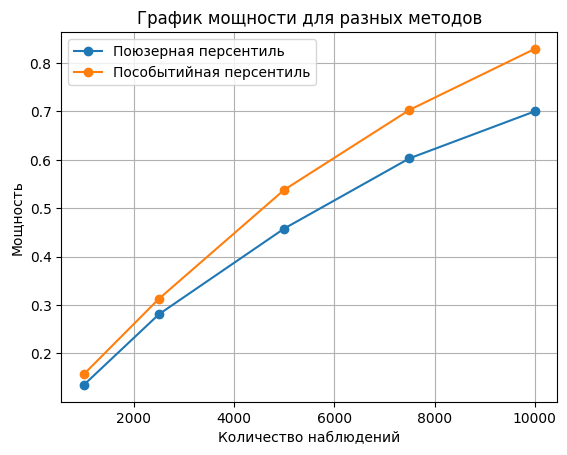

In [71]:
n = [1000, 2500, 5000, 7500, 10000]

plt.plot(n, good_cnt_iid, marker='o', label='Поюзерная персентиль')
plt.plot(n, good_cnt, marker='o', label='Пособытийная персентиль')

plt.xlabel('Количество наблюдений')
plt.ylabel('Мощность')
plt.title('График мощности для разных методов')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
n = [1000, 2500, 5000, 7500, 10000]

df = pd.DataFrame({
    'user level': good_cnt_iid,
    'event level': good_cnt,

}, index=n)

df.index.name = 'n'
print(df)

       user level  event level
n                             
1000        0.135        0.157
2500        0.281        0.313
5000        0.458        0.538
7500        0.603        0.703
10000       0.700        0.829


## 6. Аутлайеры

In [87]:
def remove_outliers(cap, sample_size = 10000, num_iterations = 10000, quantile = 0.99):
    pvalue_tt = []
    pvalue_tt_separatеly = []
    pvalue_tt_together = []
    pvalue_tt_cap = []
    var = []
    var_clean = []

    for i in tqdm(range(num_iterations)):      
        control = np.random.normal(loc=0, scale=1, size=sample_size)
        m = len(control)
        m_outliers = random.randint(np.floor(0.005*m), np.floor(0.01*m))

        test = np.random.normal(loc=0, scale=1, size=sample_size)
        n = len(test)
        n_outliers = random.randint(np.floor(0.005*n), np.floor(0.01*n))
        
        outlier_indices_m = np.random.choice(np.arange(len(control)), size=m_outliers, replace=False)
        control[outlier_indices_m] = np.random.uniform(low=10, high=20, size=m_outliers)
        var.append(np.var(control, ddof=1))
        
        outlier_indices_n = np.random.choice(np.arange(len(test)), size=n_outliers, replace=False)
        test[outlier_indices_n] = np.random.uniform(low=10, high=20, size=n_outliers)
        
        _, pvalue = stats.ttest_ind(test, control, equal_var=False)
        pvalue_tt.append(pvalue)
        outlier_control_filter = np.quantile(control, quantile)
        outlier_test_filter = np.quantile(test, quantile)
        
        outlier_filter = np.quantile(np.concatenate([control, test]), 1-(1-quantile)*2)
        var_clean.append(np.var(control[control < cap], ddof = 1))
        
        _, pvalue_separatеly = stats.ttest_ind(test[test < outlier_test_filter], control[control < outlier_control_filter], equal_var=False)
        _, pvalue_together = stats.ttest_ind(test[test < outlier_filter], control[control < outlier_filter], equal_var=False)
        _, pvalue_cap = stats.ttest_ind(test[test < cap], control[control < cap], equal_var=False)
        pvalue_tt_separatеly.append(pvalue_separatеly)
        pvalue_tt_together.append(pvalue_together)
        pvalue_tt_cap.append(pvalue_cap)
    return pvalue_tt, pvalue_tt_separatеly, pvalue_tt_together, pvalue_tt_cap, var, var_clean

In [94]:
pvalue_tt, pvalue_tt_separatеly, pvalue_tt_together, pvalue_tt_cap, var, var_clean = remove_outliers(cap = 10)

100%|██████████| 10000/10000 [00:40<00:00, 244.84it/s]


Ошибка I рода: 0.206,
CI для oшибки I рода: [0.1981, 0.2139]
Статистика Колмагорова-Смирнова: 0.2154, pvalue для сравнения ЭФР с равномерным: 0.0
Гипотеза H0 отвергается: выборка НЕ из равномерного U(0,1)


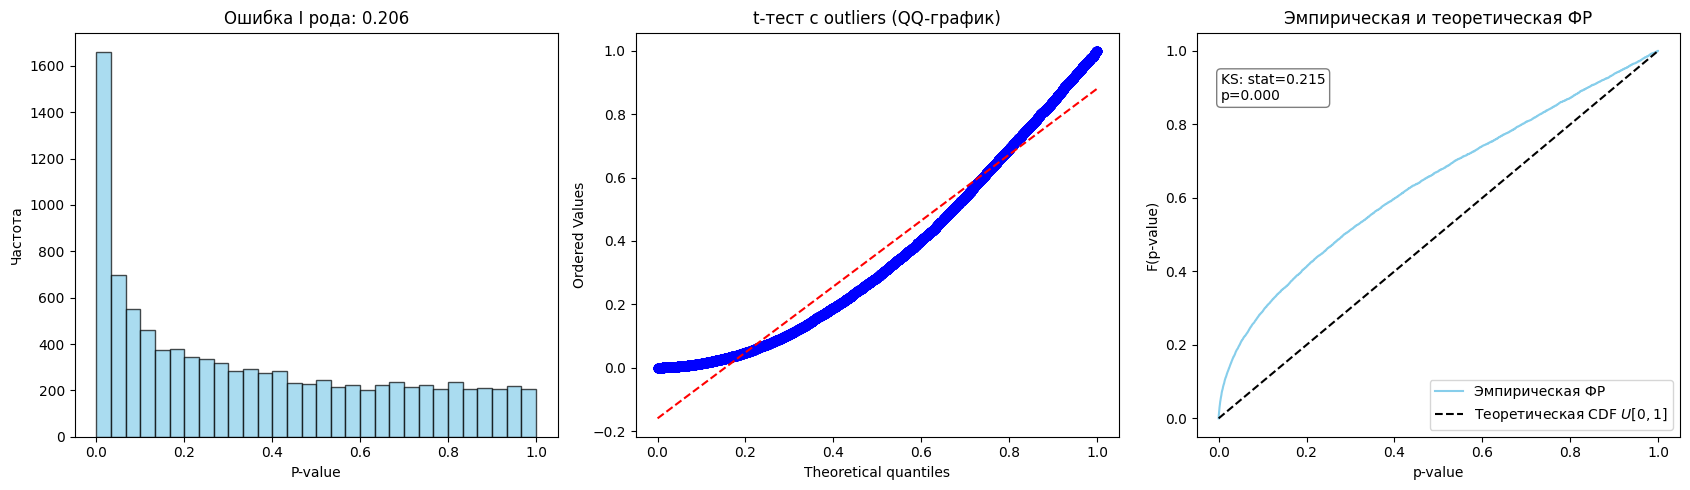

In [95]:
plot_comparison_with_uniform(pvalue_tt, 't-тест с outliers')

Ошибка I рода: 0.0773,
CI для oшибки I рода: [0.0721, 0.0825]
Статистика Колмагорова-Смирнова: 0.0517, pvalue для сравнения ЭФР с равномерным: 0.0
Гипотеза H0 отвергается: выборка НЕ из равномерного U(0,1)


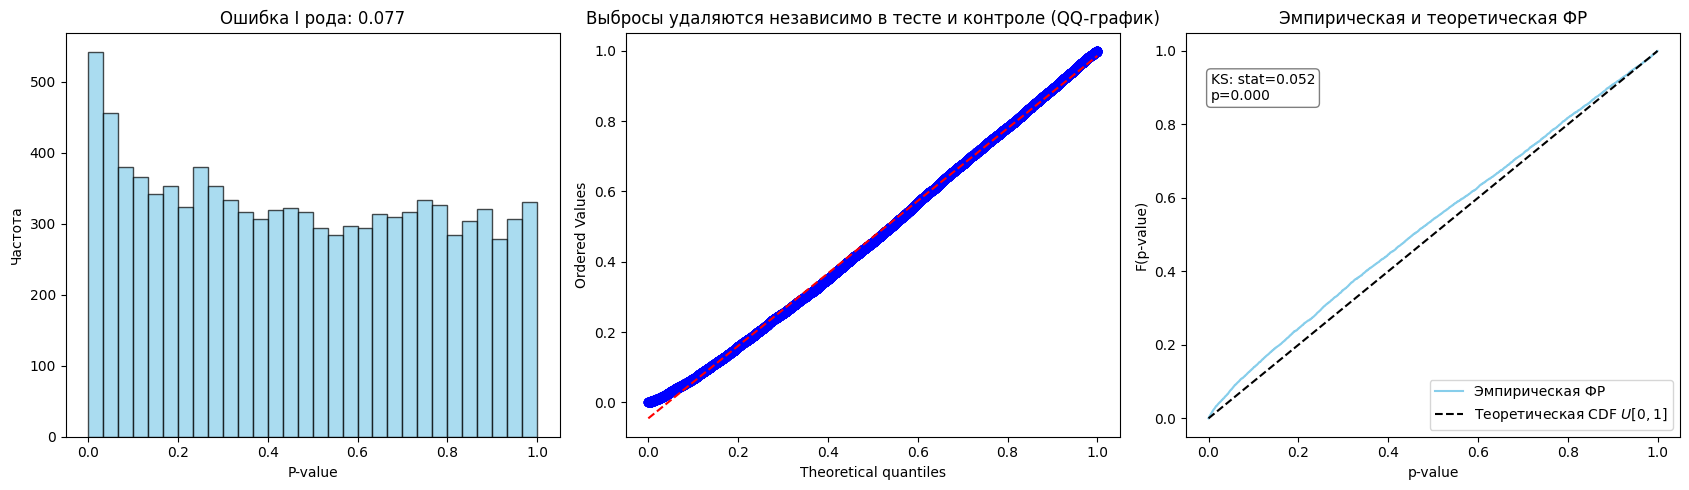

In [96]:
plot_comparison_with_uniform(pvalue_tt_separatеly, 'Выбросы удаляются независимо в тесте и контроле')

Ошибка I рода: 0.0526,
CI для oшибки I рода: [0.0482, 0.057]
Статистика Колмагорова-Смирнова: 0.0102, pvalue для сравнения ЭФР с равномерным: 0.249
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


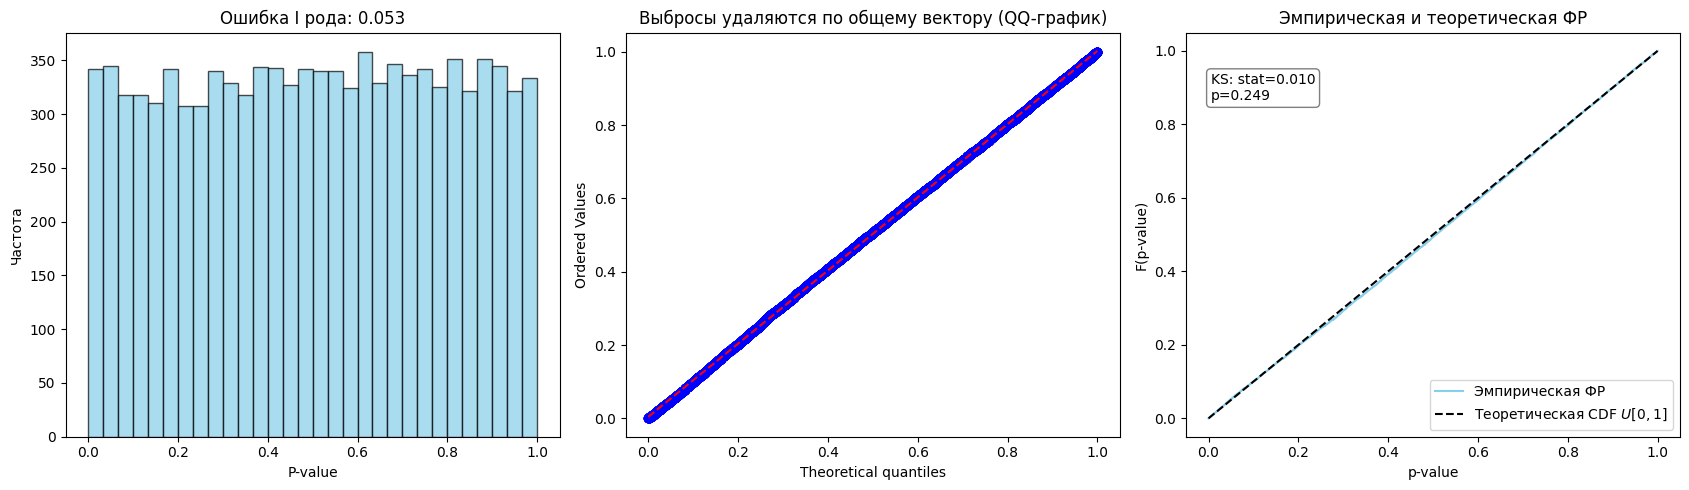

In [97]:
plot_comparison_with_uniform(pvalue_tt_together, 'Выбросы удаляются по общему вектору')

Ошибка I рода: 0.0544,
CI для oшибки I рода: [0.05, 0.0588]
Статистика Колмагорова-Смирнова: 0.0062, pvalue для сравнения ЭФР с равномерным: 0.8286
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


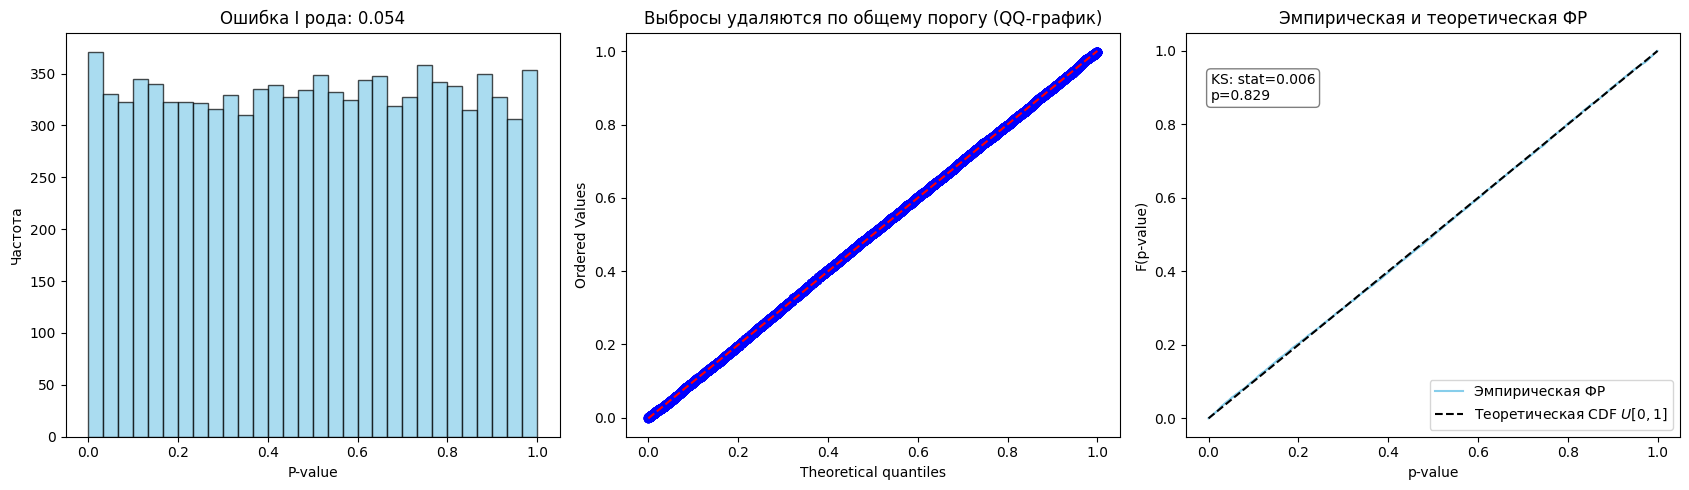

In [98]:
plot_comparison_with_uniform(pvalue_tt_cap, 'Выбросы удаляются по общему порогу')

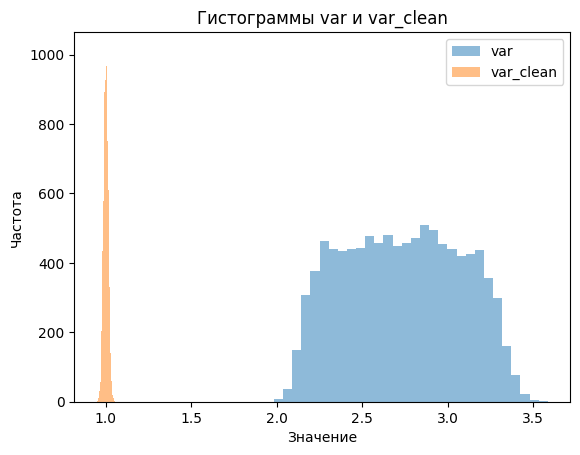

In [99]:
plt.hist(var, bins=30, alpha=0.5, label='var')
plt.hist(var_clean, bins=30, alpha=0.5, label='var_clean')
plt.legend()
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограммы var и var_clean')
plt.show()

## 7.1 CUPED

- разбиение на тест и контроль 1:k 

$m > \dfrac{(z_{1-\alpha/2} + z_{1-\beta})^2 (1 + k)\sigma^2}{e^2}$

$n = \dfrac{m}{k}$

$m + n > \left(1+\dfrac{1}{k}\right)\dfrac{(z_{1-\alpha/2} + z_{1-\beta})^2 (1 + k)\sigma^2}{e^2}$

Метод CUPED (Controlled-experiment Using Pre-Experiment Data) — это техника улучшения чувствительности эксперимента (A/B теста) за счёт учёта информации о пользователях до эксперимента.  

[Ссылка на оригинальную статью](https://docs.yandex.ru/docs/view?tm=1749411883&tld=ru&lang=en&name=2013-02-CUPED-ImprovingSensitivityOfControlledExperiments.pdf&text=сuped%20Controlled%20Pre-experiment%20Data%20deng%20microsoft&url=https%3A%2F%2Fexp-platform.com%2FDocuments%2F2013-02-CUPED-ImprovingSensitivityOfControlledExperiments.pdf&lr=103817&mime=pdf&l10n=ru&sign=29a509e67d6f16e592323500921833ef&keyno=0&nosw=1&serpParams=tm%3D1749411883%26tld%3Dru%26lang%3Den%26name%3D2013-02-CUPED-ImprovingSensitivityOfControlledExperiments.pdf%26text%3D%25D1%2581uped%2BControlled%2BPre-experiment%2BData%2Bdeng%2Bmicrosoft%26url%3Dhttps%253A%2F%2Fexp-platform.com%2FDocuments%2F2013-02-CUPED-ImprovingSensitivityOfControlledExperiments.pdf%26lr%3D103817%26mime%3Dpdf%26l10n%3Dru%26sign%3D29a509e67d6f16e592323500921833ef%26keyno%3D0%26nosw%3D1)

CUPED уменьшает дисперсию оценки средних, используя ковариат (pre-experiment metric) как регрессор.

<img src="pictures/CUPED.png" width="800">

Для этого рассмотрим новую переменную 

$Z_i = Y_i - \theta X_i + \theta E X$, 

где

$Y_i$ - значение метрики для пользователя $i$

$X_i$ - ковариат для пользователя $i$ (обычно значение метрики на предпериоде)

$
\bar Z = \bar Y - \theta \bar X + \theta E X
$

$
E\bar Z = E\bar Y 
$

$
\text{Var}(\bar Z) = \text{Var}(\bar Y - \theta \bar X) = \dfrac{1}{n}\text{Var}(Y - \theta X) = \dfrac{1}{n}\left(\text{Var}Y + \theta^2 \text{Var}X - 2\theta\text{Cov}(X,Y)\right)
$

Дисперсия минимальна при 

$$\theta = \dfrac{\text{Cov}(X,Y)}{\text{Var}X}$$


$\text{Var}(\bar Z) = \dfrac{\text{Var}Y}{n}\left(1 - \dfrac{\text{Cov}^2(X,Y)}{\text{Var}X \,\text{Var}Y}\right) = \text{Var}\bar Y\left(1 - \dfrac{\text{Cov}^2(X,Y)}{\text{Var}X \,\text{Var}Y}\right)$



$
r = \dfrac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
$ - **коэффициент корреляции Пирсона**.

$\text{Var}(\bar Z)  = \text{Var}\bar Y\left(1 - r^2\right)$

In [41]:
r = 0.9
print(f'Дисперсия снизится в {1/(1 - r**2)}, количество наблюдений в {2/(1 - r**2)}')

Дисперсия снизится в 5.263157894736843, количество наблюдений в 10.526315789473687



$Z^t_i = Y^t_i - \theta X^t_i + \theta E X^t$ 

$Z^c_i = Y^c_i - \theta X^c_i + \theta E X^c$

заметим, что на исторических данных должно выполняться $E X^t = E X^c$, поэтому это слагаемое можно пропустить

$\bar Z^t_i - \bar Z^c_i = \bar Y^t_i - \theta \bar X^t_i +  \theta E X^t - \bar Y^c_i + \theta \bar X^c_i -  \theta E X^c = \bar Y^t_i - \bar Y^c_i - \theta (\bar X^t_i - \bar X^c_i)$ 

$\theta$ определяется по общему вектору $X$ и $Y$

### Что делать с новичками или редкими пользователями

- ничего
- заменить на среднее

In [42]:

def cuped_data(sample_size=10000, effect=0):
    X_pre = np.random.normal(loc=10, scale=5, size=sample_size)
    # Группы: контроль и тест
    treatment = np.random.binomial(1, 0.5, size=sample_size)

    # Истинный эффект (только у теста)
    delta = 10 * effect

    # Y = X_pre * корелляционный коэффициент + шум + эффект
    cor = 0.6
    Y = cor * X_pre + np.random.normal(loc=0, scale=2, size=sample_size) + delta * treatment

    group_control = (treatment == 0)
    group_test = (treatment == 1)
    _, pvalue_tt = stats.ttest_ind(Y[group_test], Y[group_control])

    theta = np.cov(Y, X_pre)[0, 1] / np.var(X_pre)
    Y_cuped = Y - theta * X_pre

    _, pvalue_cuped = stats.ttest_ind(Y_cuped[group_test], Y_cuped[group_control], equal_var=False)

    return pvalue_tt, pvalue_cuped

In [43]:
pvalue_tt_vec = []
pvalue_cuped_vec = []
for i in tqdm(range(10000)):
    pvalue_tt, pvalue_cuped = cuped_data(sample_size=10000, effect=0)
    pvalue_tt_vec.append(pvalue_tt)
    pvalue_cuped_vec.append(pvalue_cuped)

100%|██████████| 10000/10000 [00:27<00:00, 367.84it/s]


Ошибка I рода: 0.0478,
CI для oшибки I рода: [0.0436, 0.052]
Статистика Колмагорова-Смирнова: 0.0101, pvalue для сравнения ЭФР с равномерным: 0.2591
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


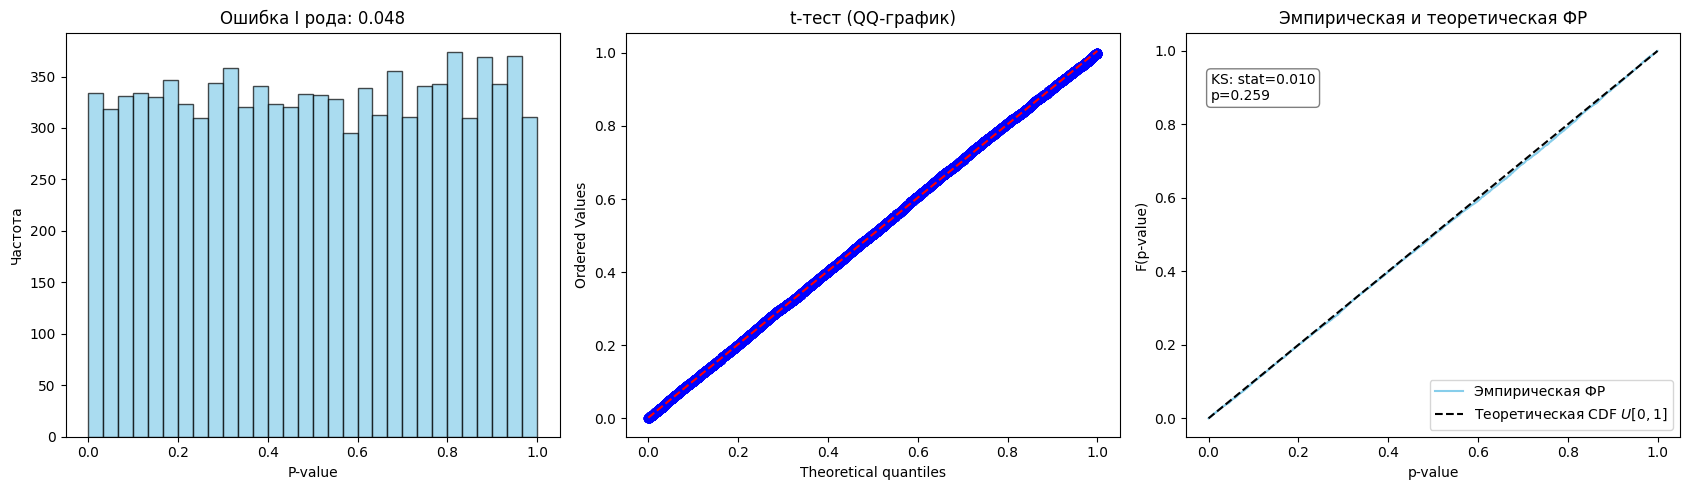

In [44]:
plot_comparison_with_uniform(pvalue_tt_vec, 't-тест')

Ошибка I рода: 0.0464,
CI для oшибки I рода: [0.0423, 0.0505]
Статистика Колмагорова-Смирнова: 0.0117, pvalue для сравнения ЭФР с равномерным: 0.1296
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


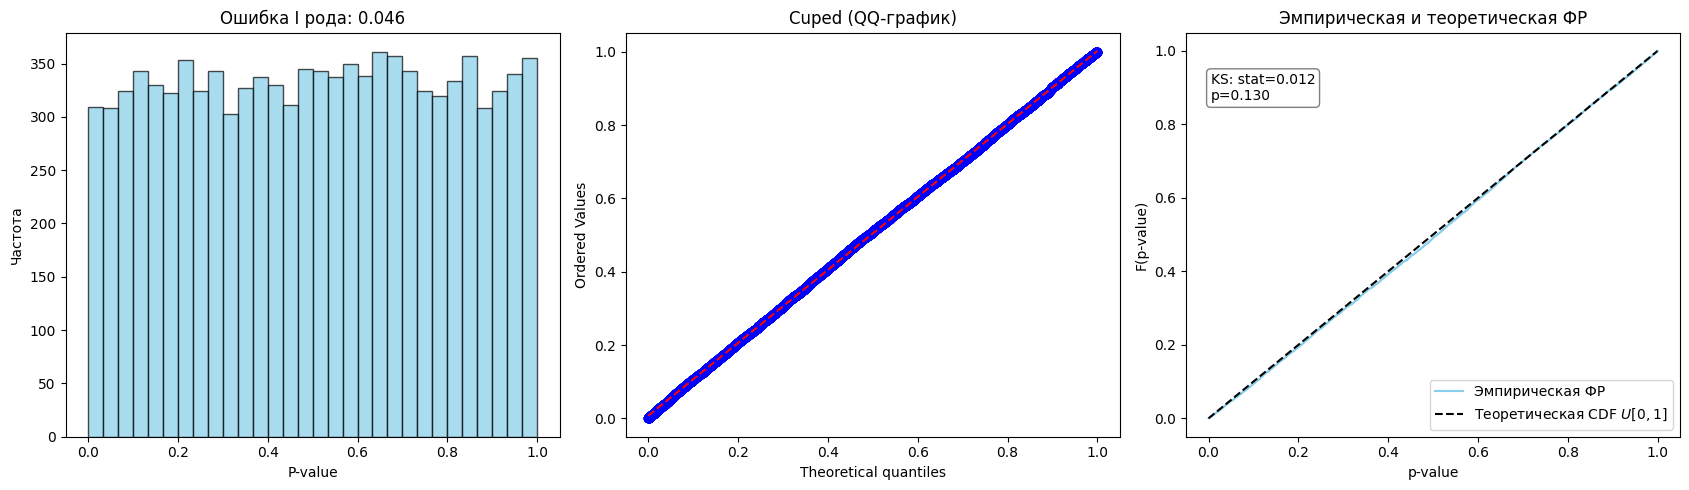

In [45]:
plot_comparison_with_uniform(pvalue_cuped_vec, 'Cuped')

In [46]:
good_cnt_tt = []
good_cnt_cuped = []
for n in [25, 50, 100, 500, 1000, 2000, 5000, 10000, 20000, 35000, 50000, 75000, 100000]:
    cnt_tt = 0
    cnt_cuped = 0
    for i in tqdm(range(1000)):
        pvalue_tt, pvalue_cuped = cuped_data(sample_size=n, effect=0.01)
        if pvalue_tt < 0.05:
            cnt_tt += 1
        if pvalue_cuped < 0.05:
            cnt_cuped += 1
    good_cnt_tt.append(cnt_tt/1000)
    good_cnt_cuped.append(cnt_cuped/1000)

100%|██████████| 1000/1000 [00:16<00:00, 61.06it/s]


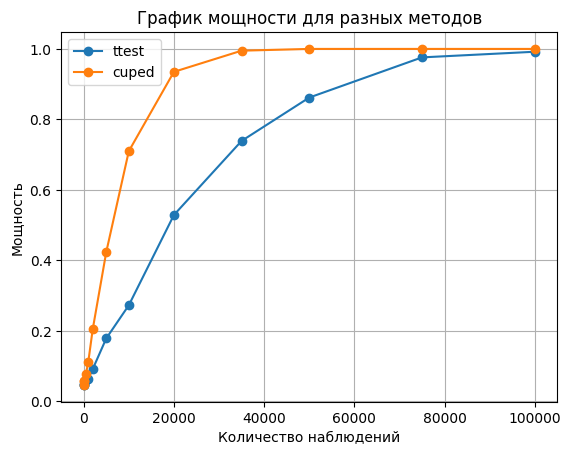

In [47]:
n = [25, 50, 100, 500, 1000, 2000, 5000, 10000, 20000, 35000, 50000, 75000, 100000]

plt.plot(n, good_cnt_tt, marker='o', label='ttest')
plt.plot(n, good_cnt_cuped, marker='o', label='cuped')

plt.xlabel('Количество наблюдений')
plt.ylabel('Мощность')
plt.title('График мощности для разных методов')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
n = [25, 50, 100, 500, 1000, 2000, 5000, 10000, 20000, 35000, 50000, 75000, 100000]

df = pd.DataFrame({
    't-test': good_cnt_tt,
    'cuped': good_cnt_cuped

}, index=n)

df.index.name = 'n'
print(df)

        t-test  cuped
n                    
25       0.049  0.048
50       0.047  0.058
100      0.047  0.058
500      0.062  0.079
1000     0.065  0.111
2000     0.092  0.205
5000     0.179  0.424
10000    0.273  0.710
20000    0.529  0.935
35000    0.739  0.995
50000    0.862  1.000
75000    0.976  1.000
100000   0.992  1.000
